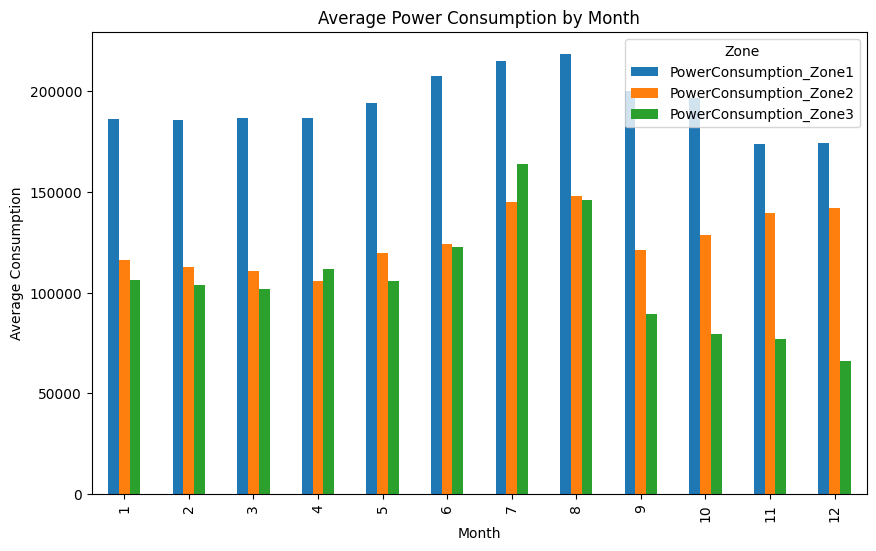

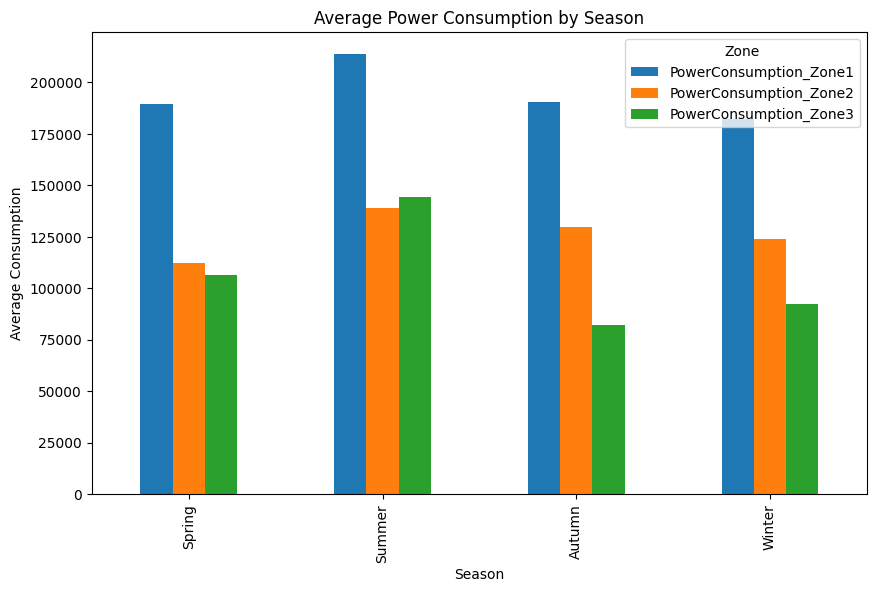

      PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3
Date                                                                        
1               5.413014e+07            3.405620e+07            3.013519e+07
2               5.452742e+07            3.482267e+07            3.026938e+07
3               5.528238e+07            3.579256e+07            3.017247e+07
4               5.515130e+07            3.617308e+07            3.054090e+07
5               5.518483e+07            3.568560e+07            3.041963e+07
6               5.560467e+07            3.623904e+07            3.049866e+07
7               5.569593e+07            3.672861e+07            3.047524e+07
8               5.612784e+07            3.603830e+07            3.121936e+07
9               5.540858e+07            3.614436e+07            3.115672e+07
10              5.586334e+07            3.621795e+07            3.071827e+07
11              5.616618e+07            3.627682e+07            3.067884e+07

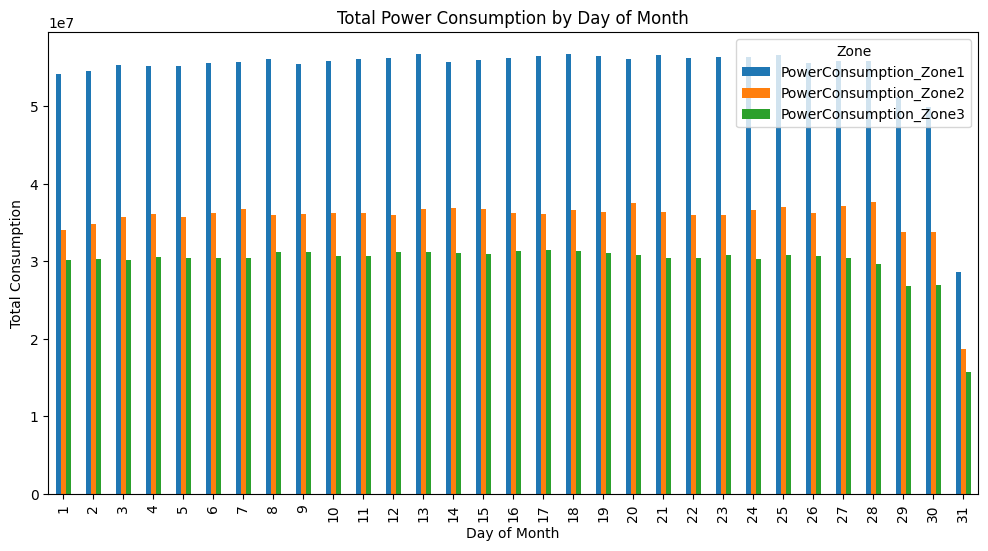

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load the Preprocessed Data
# ----------------------------
df = pd.read_csv("preprocessed_powerconsumption_hourly.csv", parse_dates=["Datetime"], index_col="Datetime")

# ----------------------------
# 2. Visualize Power Consumption by Month
# ----------------------------
# Group by Month and calculate the average consumption for each zone
monthly_consumption = df.groupby("Month")[[col for col in df.columns if "PowerConsumption" in col]].mean()

monthly_consumption.plot(kind="bar", figsize=(10, 6))
plt.title("Average Power Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption")
plt.legend(title="Zone")
plt.show()

# ----------------------------
# 3. Visualize Power Consumption by Season
# ----------------------------
# Group by Season and calculate the average consumption for each zone
seasonal_consumption = df.groupby("Season")[[col for col in df.columns if "PowerConsumption" in col]].mean()

season_map = {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}
seasonal_consumption.index = seasonal_consumption.index.map(season_map)

seasonal_consumption.plot(kind="bar", figsize=(10, 6))
plt.title("Average Power Consumption by Season")
plt.xlabel("Season")
plt.ylabel("Average Consumption")
plt.legend(title="Zone")
plt.show()

power_cols = [col for col in df.columns if "PowerConsumption" in col]

# Group by the "Date" column and sum power consumption values for each day-of-month
daily_consumption_by_date = df.groupby("Date")[power_cols].sum()

# Plot the results as a bar chart
daily_consumption_by_date.plot(kind="bar", figsize=(12, 6))
plt.title("Total Power Consumption by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Total Consumption")
plt.legend(title="Zone")
plt.show()


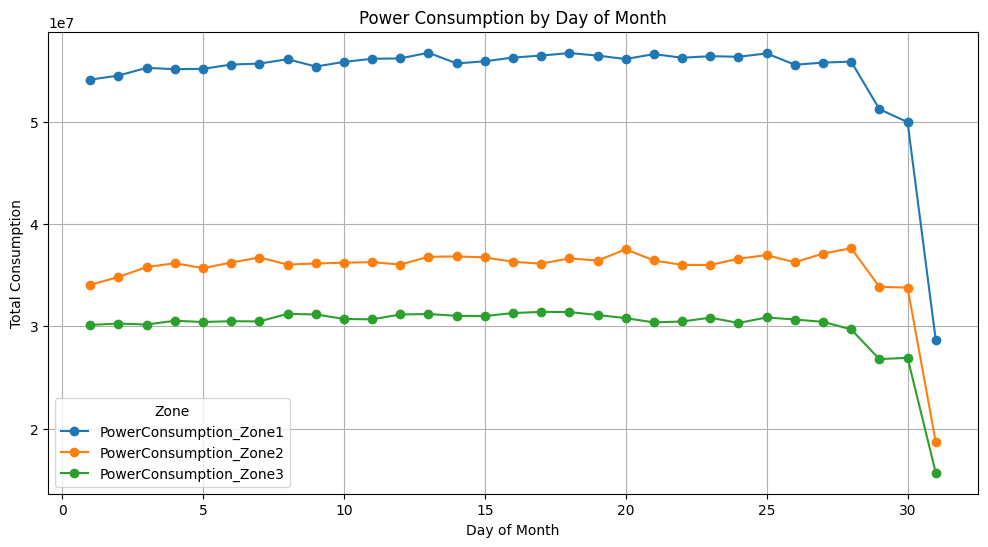

In [3]:
power_cols = [col for col in df.columns if "PowerConsumption" in col]

# Group by the 'Date' column and sum power consumption for each day of the month
daily_consumption_by_date = df.groupby("Date")[power_cols].sum()

# Plot a time series (line plot) using the existing 'Date' column as x-axis
plt.figure(figsize=(12, 6))
for col in power_cols:
    plt.plot(daily_consumption_by_date.index, daily_consumption_by_date[col], marker='o', label=col)

plt.title("Power Consumption by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Total Consumption")
plt.legend(title="Zone")
plt.grid(True)
plt.show()